In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from snowflake.sqlalchemy import URL

In [2]:
pip install snowflake-connector-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install snowflake-sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#OBDC -> OPEN DATABASE CONNECTION/CONNECTOR
#config = {"user": "JOSUANDPM",
#          "password": "kd8attYHKyzqC5e",
#          "identificador_cuenta":"BS57583"
#          }
#url_conexion = f"snowflake://{config["user"]}:{config["password"]}@{config["identificador_cuenta"]}/"

#motor = create_engine(url_conexion)

In [ ]:

#motor = snowflake.connector.connect(
#    account = "NCJYNST-BS57583",
#    user = "JOSUANDPM", 
#    password = "kd8attYHKyzqC5e" ,
#    database = "INSTACART_DB" ,
#    schema = "RAW",
#    warehouse = "COMPUTE_WH",
#    role =  "ACCOUNTADMIN", 

#)

In [2]:

motor = create_engine(URL(
    account = "NCJYNST-BS57583",
    user = "JOSUANDPM", 
    password = "kd8attYHKyzqC5e" ,
    database = "INSTACART_DB" ,
    schema = "RAW",
    warehouse = "COMPUTE_WH",
    role =  "ACCOUNTADMIN", 

))

In [3]:
try:
    conexion = motor.connect()
    print("Conexion exitosa.")
except:
    print("La conexion no se pudo dar, sucedio un error.")

Conexion exitosa.


In [4]:
consulta = "select * from ordenes"

crudo_ordenes = pd.read_sql(consulta, con=motor)

In [16]:
crudo_ordenes = pd.read_csv('../datasets/instacart_orders.csv', sep=';')

In [6]:
crudo_ordenes.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [7]:
crudo_ordenes.query('user_id == 183418')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
236116,566564,183418,23,0,8,9.0
419182,1861906,183418,16,6,10,27.0
428409,642049,183418,25,2,9,6.0


In [8]:
crudo_ordenes.query('user_id == 163593')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,1690866,163593,5,5,12,9.0
136792,60739,163593,17,6,13,9.0
409286,3077764,163593,12,6,7,4.0
449641,2691848,163593,15,3,8,7.0


In [9]:
crudo_ordenes['user_id'].value_counts()

user_id
149605    28
193164    26
78375     25
148162    24
134511    24
          ..
71501      1
187439     1
6845       1
176472     1
34561      1
Name: count, Length: 157437, dtype: int64

In [10]:
crudo_ordenes.query('user_id == 193164').sort_values('order_number')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
240711,192043,193164,5,2,12,4.0
447044,826729,193164,9,2,11,8.0
387419,2051889,193164,12,5,14,3.0
117865,2302763,193164,13,1,10,3.0
308325,3184720,193164,14,5,14,18.0
168505,1204116,193164,16,1,17,3.0
61018,1746856,193164,18,2,12,6.0
35009,1891169,193164,29,2,16,1.0
255039,659377,193164,31,4,10,6.0
117994,2403078,193164,32,5,14,1.0


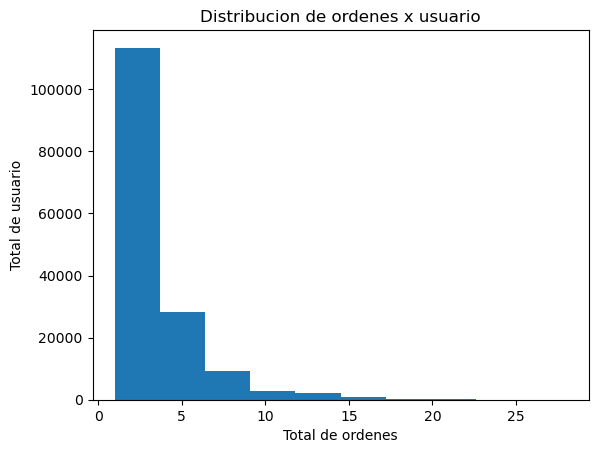

In [11]:
crudo_ordenes['user_id'].value_counts().plot(
    kind='hist',
    title='Distribucion de ordenes x usuario',
    xlabel='Total de ordenes',
    ylabel='Total de usuario'
)
plt.show()

In [12]:
crudo_ordenes

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [13]:
crudo_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [18]:
crudo_ordenes.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool

In [14]:
crudo_ordenes[crudo_ordenes.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [15]:
total_repetidos = crudo_ordenes.duplicated().sum()

In [16]:
print(f'El total de filas repetidas es: {total_repetidos}')

El total de filas repetidas es: 15


In [20]:
crudo_ordenes.query('order_id == 1021560')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
242618,1021560,53767,3,3,2,9.0
311713,1021560,53767,3,3,2,9.0


Los datos de ventas / ordenes / facturas presentan un total de 15 filas / ordenes repetidas.

Los datos que me envio el equipo de TI, SON UNA MUESTRA DEL TOTAL DE FAVTURAS GENERADAS.

In [24]:
order_ids_repetidos = crudo_ordenes.duplicated("order_id").sum()
print(f"Existen {order_ids_repetidos} ordenes repetidas por order_id")

Existen 15 ordenes repetidas por order_id


Analisis de valores ausentes


In [27]:
crudo_ordenes.isna()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
478962,False,False,False,False,False,False
478963,False,False,False,False,False,False
478964,False,False,False,False,False,False
478965,False,False,False,False,False,False


La columna presenta 28819 datos ausentes o faltantes

In [32]:
datos_ausentes = crudo_ordenes[crudo_ordenes.isna()["days_since_prior_order"]]

In [34]:
datos_ausentes["order_number"].unique()

array([1], dtype=int64)

Todas las filas que tienen un valor faltante en la columna "days_since_prior_order" vienen de la primera factura.

In [45]:
datos_ausentes.duplicated().sum()

2

In [48]:
datos_ausentes = datos_ausentes.drop_duplicates()

In [50]:
datos_ausentes.duplicated().sum()

0

In [39]:
primeras_ordenes = crudo_ordenes.query("order_number == 1")

In [47]:
primeras_ordenes.duplicated().sum()

2

In [51]:
primeras_ordenes = primeras_ordenes.drop_duplicates()

In [52]:
primeras_ordenes.duplicated().sum()

0

In [ ]:
comprobacion_primeras_ordernes = primeras_ordenes.merge(datos_ausentes, how="inner", on="order_id")
print(f"Total de filas de primeras ordenes: {primeras_ordenes.shape}")
print(f"Total de filas de ordenes con ausentes: {datos_ausentes.shape}")
print(f"Total de la union de ambas: {comprobacion_primeras_ordernes.shape}")
comprobacion_primeras_ordernes.shape

Total de filas de primeras ordenes: (28817, 6)
Total de filas con ordenes ausentes: (28817, 6)
Total de la union de ambas: (28817, 11)


(28817, 11)

Una opcion de relleno de la oclumna con valores ausentes es 0 o -1. Tener en cuenta que si se llena con 0 se mezclan los 0s con las ordenes que un usuario compra el mismo dia. 


## PRODUCTOS

In [56]:
consulta = "select * from productos"

crudo_productos = pd.read_sql(consulta, con=motor)

In [57]:
crudo_productos.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [59]:
crudo_productos["product_id"].count()

49694

In [61]:
crudo_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## Duplicados

In [63]:
crudo_productos.duplicated().sum()

0

No hay filas enteras completas que se repiten

In [64]:
crudo_productos["product_id"].duplicated().sum()

0

no hay productos con el mismo id repetidos

In [ ]:
nombre_productos_repetidos = crudo_productos["product_name"].duplicated().sum()

crudo_productos[crudo_productos.duplicated("product_name")]

,product_id,product_name,aisle_id,department_id
71,72,None,100,21
109,110,None,100,21
296,297,None,100,21
416,417,None,100,21
436,437,None,100,21
...,...,...,...,...
49552,49553,None,100,21
49574,49575,None,100,21
49640,49641,None,100,21
49663,49664,None,100,21


In [67]:
crudo_productos.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [70]:
productos_sin_nombre = crudo_productos[crudo_productos["product_name"].isna()]
print(productos_sin_nombre)

       product_id product_name  aisle_id  department_id
37             38         None       100             21
71             72         None       100             21
109           110         None       100             21
296           297         None       100             21
416           417         None       100             21
...           ...          ...       ...            ...
49552       49553         None       100             21
49574       49575         None       100             21
49640       49641         None       100             21
49663       49664         None       100             21
49668       49669         None       100             21

[1258 rows x 4 columns]


In [74]:
productos_sin_nombre["aisle_id"].unique()

productos_sin_nombre["department_id"].unique()

array([21], dtype=int64)

Existen valores ausentes en el nombre del producto. Estos son considerados como repetidos en esa columna. Todos los productos sin nombre vienen del pasillo 100 y departamento 21.

A los valores ausentes se recomienda poner un nombre estabdar: Producto no definido.

In [80]:

crudo_productos[crudo_productos["product_name"].str.upper().duplicated() & (~crudo_productos["product_name"].isna())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Hay productos que cuando se estandarizan (se vuelven mayusculas) presentan repetidos, sin los ausentes. No es ideal borrarlos ya que presentan diferentes ids.
Por ende pueden quedar las ventas huerfanas

## Ordenes Productos

In [85]:
consulta = "select * from ordenes_productos"

crudo_ordenes_productos = pd.read_sql(consulta, con=motor)

In [86]:
crudo_ordenes_productos.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [88]:
crudo_ordenes_productos.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


La columna de add_to_cart es un decimal. Hay que transformar a int ya que no hay posiciones como 1.5 en un carro

In [93]:
crudo_ordenes_productos.query("order_id == 491251").sort_values("product_id")

,order_id,product_id,add_to_cart_order,reordered
996664,491251,1106,4.0,1
3595984,491251,2693,15.0,1
4277602,491251,4907,41.0,1
3,491251,8670,35.0,1
2813827,491251,9076,9.0,1
1330904,491251,9199,32.0,1
441508,491251,10521,39.0,1
1055694,491251,11182,23.0,1
1850567,491251,11662,30.0,1
1952377,491251,12508,16.0,1


In [95]:
crudo_ordenes_productos.duplicated().sum()

0

In [98]:
crudo_ordenes_productos.duplicated(["order_id" , "product_id"]).sum()

0

Los datos de facturas al detalle no presentan repetidos explicitos ni repetidos implicitos (Combinacion de order_id & product_id)


In [99]:
crudo_ordenes_productos.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [103]:
crudo_ordenes_productos[crudo_ordenes_productos["add_to_cart_order"].isna()].sort_values("order_id")

,order_id,product_id,add_to_cart_order,reordered
2437093,9310,25753,NaN,0
3195573,61355,39972,NaN,0
3941595,61355,17807,NaN,0
2968806,61355,29660,NaN,0
3965219,61355,49325,NaN,0
...,...,...,...,...
3760909,3383594,63,NaN,0
3784932,3383594,49144,NaN,1
2772397,3383594,46710,NaN,0
1537276,3383594,15076,NaN,0
